# 사이킷런을 이용한 특징 추출(p.58)

텍스트 -> 벡터로 만드는 방법
- CountVectorizer : 횟수 특징
- TfidfVectorizer : TF-IDF 사용
- HashingVectorizer : Count와 비슷, 실행시간을 크게 줄일 수 있음

## CountVectorizer
1) 객체 만들기
2) 객체에 특정 텍스트 적합  
(적합 : 횟수를 셀 단어의 목록을 만드는 과정)
3) 횟수를 기준으로 해당 텍스트 벡터화


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']
count_vectorizer = CountVectorizer()

### 단어 사전 만들기
생성한 객체에 fit()으로 데이터를 적용하면 자동으로 단어 사전을 생성한다.

In [3]:
count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


### 텍스트 데이터를 벡터로
: 텍스트 데이터에서 특징 추출

In [4]:
text_data[0]

'나는 배가 고프다'

In [5]:
sentence = [text_data[0]]
print(count_vectorizer.transform(sentence).toarray())

[[1 0 1 0 0 0 1 0 0 0]]


## TfidfVectorizer
TF-IDF라는 특정 값을 사용  
TF(Term Frequency) : 특정 단어가 데이터 안에서 등장하는 횟수  
DF(Document Frequency) : 문서 빈도 값. 특정 단어가 여러 데이터에 자주 등장하는지를 알려주는 지표  
IDF (Inverse DF) : DF에 역수를 취한 값. 특정 데이터가 다른 데이터에 등장하지 않을 수록 값이 커짐

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
text_data

['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

In [8]:
tfidf_vectorizer = TfidfVectorizer()

In [9]:
## 사전 만들기
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

## 벡터화
sentence = [text_data[3]]
print(tfidf_vectorizer.transform(sentence).toarray())

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}
[[0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


# 한글 토크나이징 라이브러리
## KoNLPy (Python)

In [10]:
import konlpy

### 형태소 단위 토크나이징
KoLNPy에서는 여러 형태소 분석기를 제공하며, 각 형태소 분석기별로 분석한 결과는 다를 수 있다.  
형태소 분석기는 클래스 형태이며 객체로 생성한 후 호출하여 토크나이징을 사용한다.

### 형태소 분석 및 품사 태깅
[KoNLPy에 포함된 형태소 분석기 목록]  
- Hannanum
- Kkma
- Komoran
- Mecab : 윈도우에서 사용 불가
- Okt(원래이름은 Twitter)

각기 성능이 조금씩 다르므로 직접 비교해보고 자신의 데이터를 가장 잘 분석하는 분석기를 사용하기를 권장한다.

### Okt
[Okt 객체 함수]  
okt.morphs() : 텍스트를 형태소 단위로 나눈다. 옵션 norm(정규화)=True/False, stem(어간추출)=True/False  
okt.noums() : 명사만 뽑아낸다  
okt.phrases() : 어절을 뽑아낸다  
okt.pos() : 품사 태깅. 옵션 norm, stem, join=True/False

In [11]:
from konlpy.tag import Okt
okt = Okt()

In [13]:
text = '한글 자연어 처리는 재밌다 이제부터 열심히 해야지ㅎㅎㅎ'

print(okt.morphs(text))
print(okt.morphs(text, stem=True))
print(okt.morphs(text, norm=True))
print(okt.morphs(text, norm=True, stem=True))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [14]:
print(okt.nouns(text))
print(okt.phrases(text))

['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']


In [15]:
print(okt.pos(text))
print(okt.pos(text, join=True))
print(okt.pos(text, norm=True))
print(okt.pos(text, stem=True))

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]
['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('하다', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


KoNLPy데이터 라이브러리 임포트 (p.75)

# 자연어 처리
## 해결할 문제 분류
텍스트 분류, 텍스트 유사도, 텍스트 생성, 기계 이해로서 자연어 처리의 핵심 문제

## 단어 표현(Word Representation) = 단어 임베딩 = 단어 벡터
텍스트를 자연어 처리를 위한 모델에 적용할 수 있게 언어적 특성을 반영해서 단어를 수치화하는 방법을 찾는 것

### (1) 원-핫 인코딩(one-hot encoding)
- 결정적인 문제 두가지  
수백만 개가 넘는 단어를 표현할 때 각 단어 벡터의 크기가 너무 커져 공간을 많이 사용하게 됨 (비효율)
단순히 단어가 뭔지만 알 수 있고, 벡터값 자체에는 단어의 의미나 특성의 표시되지 x

벡터의 크기가 작으면서도 벡터가 단어의 의미를 표현할 수 있는 방법 <- 분포 가설을 기반으로 함.
(분포 가설 : 같은 문맥의 단어(비슷한 위치에 나오는 단어)는 비슷한 의미를 가진다)

**비슷한 위치에 있는 단어는 단어간의 유사도가 높다고 판단**
1) count-base(p.108) : 데이터가 많은 경우에는 단어가 잘 표현되고 효율적이어서 아직까지도 많이 사용되고 있다.
2) predictive : 신경망 구조 혹은 모델ㅇ르 통해 특정 문맥에서 어떤 단어가 나올지 예측하면서 단어를 벡터로 만드는 방식
 - Word2vecc : CBOW(Continues Bag of Words)와 Skip-Gram 모델이 있음 (이 두 모델은 각각 반대 개념) + Glove (CBOW + Skip-Gram)  
   단어간 유사도를 잘 측정한다. 단어들의 복잡한 특징까지도 잘 잡아낸다. -> 유의미한 관계를 측정
 - NNLM(Neural Network Language Model)
 - RNNLM(Recurrent Neural Network Language Model)

## 텍스트 분류
특정 텍스트를 사람들이 정한 몇 가지 범주(Class)중에 어느 범주에 속하는지 분류하는 문제 (이진/다중 범주 분류)

### 지도 학습을 통한 텍스트 분류 (p.115)
(그림 3.7) 문장 분류 과정 참고  

[지도 학습을 통한 다양한 문장 분류]
나이브 베이즈 분류(Naive Bayes Classifier)  
서포트 벡터 머신(Support Vector Machine)  
신경망(Neural Network)  
선형 분류(Linear Classifier)  
로지스틱 분류(Logistic Classifier)  
랜덤 포레스트(Random Forest)  
+ 기타 등등 
**적합한 모델은 정해져 있지 않음. 다양한 모델을 사용해봐야 함**

### 비지도 학습을 통한 텍스트 분류
비지도 학습은 데이터만 존재. 범주별로 나눠저 있지도 않음   
특성을 찾아내서 적당한 범주를 만들어 각 데이터를 나눠주면 된다.  

[k-mean clustering] (k 평균 군집화)  
: 데이터 특성에 따라 비슷한 데이터끼리 묶어주는 것.  

[비지도 학습을 통한 다양한 문장 분류]
k-평균 군집화(K-means Clustering)  
계층적 군집화(Hierarchical Clustering)  

**라벨이 있으면 지도학습을 라벨이 없으면 비지도 학습을 쓰면 된다.** 

## 텍스트 유사도(Text Similarity) (p.118)
비슷한 뜻을 가진 문장은 유사도가 높다. 하지만 유사도를 판단하는 척도는 매우 주관적이기 때문에 데이터를 구성하기가 쉽지 않고 정량화하는 데 한계가 있다. 

유사도 측정을 위한 정량화 방법  
1) 단어의 개수
2) 형태소 비교
3) 자소 단위 단어 비교
+ ....

### 딥러닝 기반 텍스트 유사도 측정 
단어, 형태소, 유사도의 종류와 상관없이, 텍스트를 베터화 한 후 벡터화된 문장 간의 유사도를 측정  
자카드, 유클리디언, 맨해튼, 코사인


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)   # 문장 벡터화

idf = tfidf_vectorizer.idf_
print(dict(zip(tfidf_vectorizer.get_feature_names(), idf)))   # 각 수치에 대한 값 시각화

{'갑작스런': 1.4054651081081644, '내일': 1.4054651081081644, '놀러왔다가': 1.4054651081081644, '망연자실': 1.4054651081081644, '반가운': 1.4054651081081644, '서쪽': 1.4054651081081644, '소식': 1.4054651081081644, '오늘': 1.4054651081081644, '으로': 1.4054651081081644, '이어졌는데요': 1.4054651081081644, '인해': 1.4054651081081644, '있습니다': 1.0, '중심': 1.4054651081081644, '폭염': 1.0, '피해서': 1.4054651081081644, '하고': 1.4054651081081644, '휴일': 1.0}


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 자카드 유사도(Jaccard Similarity)
두 문장을 각각 단어의 집합으로 만든 뒤 두 집합을 통해 유사도를 측정하는 방식 중 하나이다. 두 집합의 교집합을 합집합으로 나눈다.  
결과값은 0~1 사이의 값. 1에 가까울 수록 유사도가 높다. 

## 코사인 유사도
두 개의 벡터값에서 코사인 각도를 구하는 방법 -1~1 사이의 값. 1에 가까울 수록 유사도가 높다. 가장 많이 쓰임.  
일반적으로 성능이 좋음. 좌표 뿐만 아니라 방향도 포함하기 때문

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])   # 첫 번째와 두 번째 문장 비교

array([[0.17952266]])

## 유클리디언 유사도
가장 기본적인 거리(Euclidean Distance, L2-Distance) 를 측정하는 유사도 공식

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])   # 첫 번째와 두 번째 문장 비교

array([[1.28099753]])

출력값이 1보다 크다 이러한 유사도는 값을 제한해야 한다.  
벡터화 한 문장을 일반화한 후 다시 유클리디언 유사도로 측정하면 0~1 사이의 값을 갖는다.  
L1 정규화방법 : 각 벡터 안의 요소 값을 모두 더한 것의 크기가 1이 되도록 벡터들의 크기를 조절하는 방법
### L1 정규화 후 유클리디언 유사도

In [4]:
import numpy as np

def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

## 맨해튼 유사도(Manhattan Similarity) 
(p.123 그림 3.15 참고) 유클리디언 거리(L2)는 검은색 선을 의미한다. 이 선은 도로와 도로 사이에 아무런 장애물이 없다고 가정한 것이기 때문에 현실성이 없다. 빨간색 선인 맨해튼 거리(L1)는 도로를 감안한 거리의 길이라고 생각하면 된다.  

In [6]:
from sklearn.metrics.pairwise import manhattan_distances

manhattan_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])   # 첫 번째와 두 번째 문장 비교

array([[0.77865927]])

**맨해튼 유사도로 측정했을 때 유사도가 가장 높게 나왔다**
### 측정하는 방법에 따라 유사도가 달라질 수 있으므로 의디ㅗ하고자 하는 방향에 맞는 유사도 측정 방법을 고르는 것이 매우 중요하다.

# 자연어 생성
(생략)
# 기계 이해
기계가 텍스트를 이해하고 논리적 추론을 할 수 있는지 데이터 학습을 통해 보는 것
(생략)

# 탐색적 데이터 분석 (EDA : Exploratory Data Analysis)
정해진 틀 없이 최대한 많은 정보를 뽑아내면 된다.  
ex) 평균값, 중앙값, 최솟값, 최댓값, 범위, 분포, 이상치 등  

간단한 실습을 통해 데이터 분석에 대해서 알아보자
ex) 영화 리뷰 데이터 분석 : 감정(긍정, 부정)

In [7]:
import os 
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils


In [8]:
data_set = tf.keras.utils.get_file(
    fname="imdb.tar.gz",
    origin="http://ai.stanford.edu/~ammas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True)

In [33]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

원래 encoding='utf-8' 없었는데 에러 때문에 추가
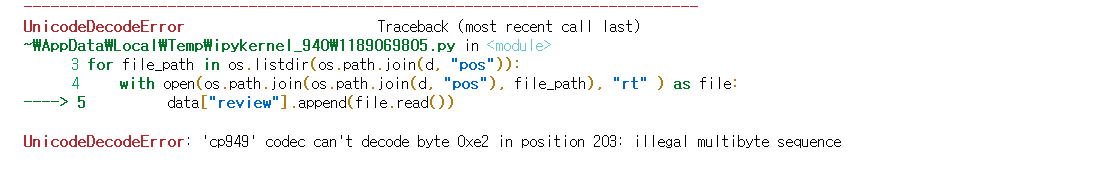

In [31]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    
    return pd.concat([pos_df, neg_df])

In [34]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [35]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [36]:
reviews = list(train_df['review'])

In [37]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]

# 토크나이징된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

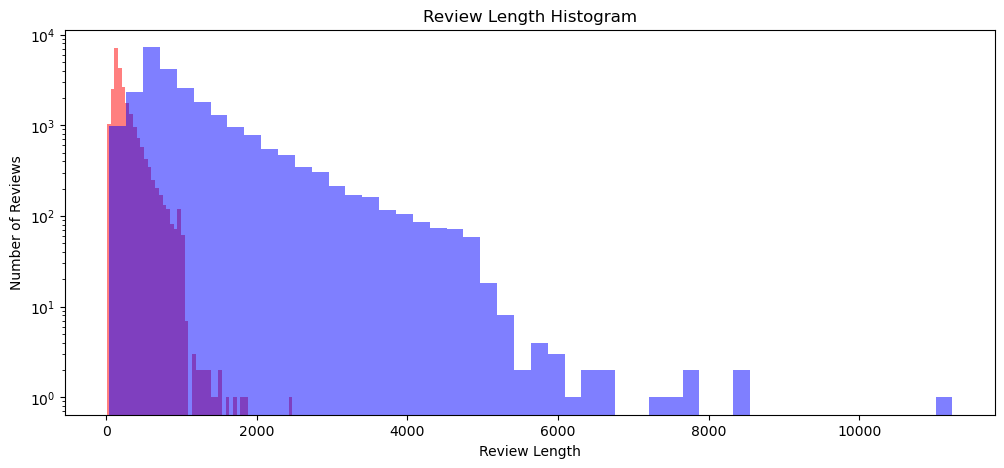

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

시각적 분포와 이상치를 알 수 있음
### 이상치 처리

In [43]:
print(f"문장 최대 길이 : {np.max(review_len_by_token)}")
print(f"문장 최소 길이 : {np.min(review_len_by_token)}")
print(f"문장 평균 길이 : {np.mean(review_len_by_token)}")
print(f"문장 길이 표준편차 : {np.std(review_len_by_token)}")
print(f"문장 중간 길이 : {np.median(review_len_by_token)}")
print(f"제1사분위 길이 : {np.percentile(review_len_by_token, 25)}")
print(f"제3사분위 길이 : {np.percentile(review_len_by_token, 75)}")

문장 최대 길이 : 2470
문장 최소 길이 : 10
문장 평균 길이 : 233.7872
문장 길이 표준편차 : 173.72955740506566
문장 중간 길이 : 174.0
제1사분위 길이 : 127.0
제3사분위 길이 : 284.0


## 박스플롯 (p.139) 참고

{'whiskers': [<matplotlib.lines.Line2D at 0x232709d8eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x23271f84490>,
 'boxes': [<matplotlib.lines.Line2D at 0x232709d8bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x23271f84a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x23271f84fd0>],
 'means': [<matplotlib.lines.Line2D at 0x23271f84d00>]}

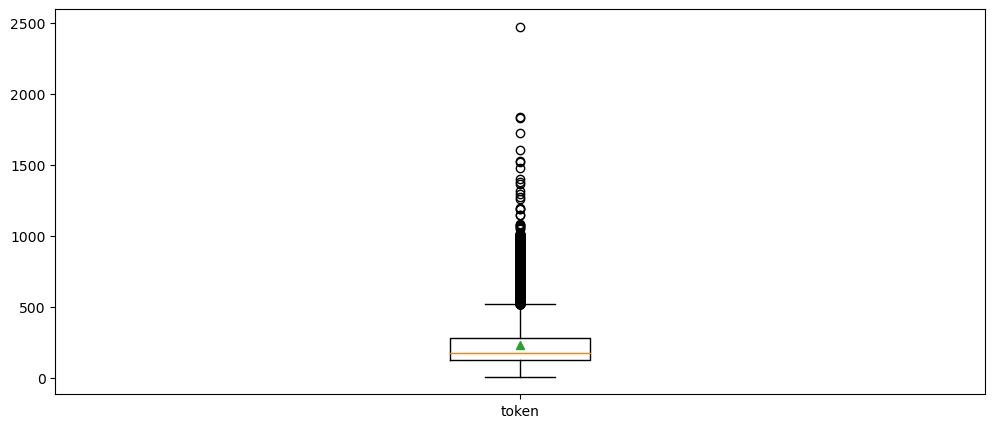

In [45]:
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_token], labels=['token'], showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x23271fc9520>,
 'caps': [<matplotlib.lines.Line2D at 0x23271fc9ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23271fc9250>],
 'medians': [<matplotlib.lines.Line2D at 0x23271fd60a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23271fd6640>],
 'means': [<matplotlib.lines.Line2D at 0x23271fd6370>]}

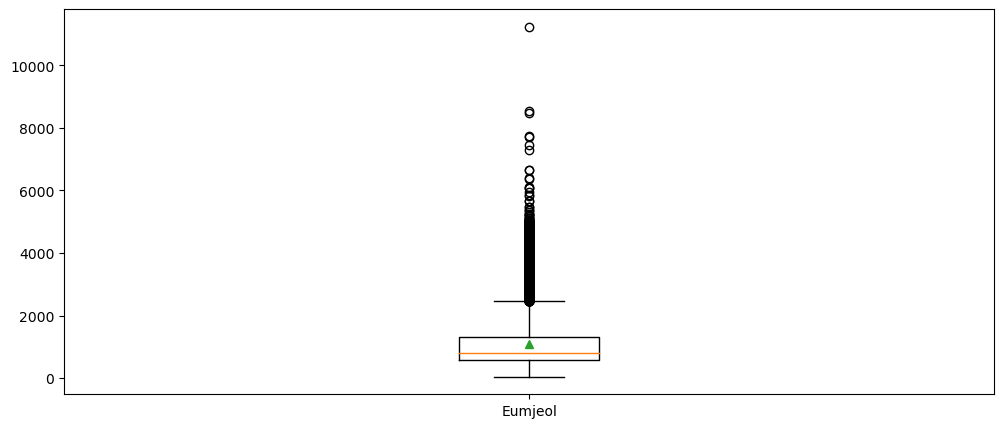

In [46]:
plt.figure(figsize=(12,5))
plt.boxplot([review_len_by_eumjeol], labels=['Eumjeol'], showmeans=True)

## 워드클라우드


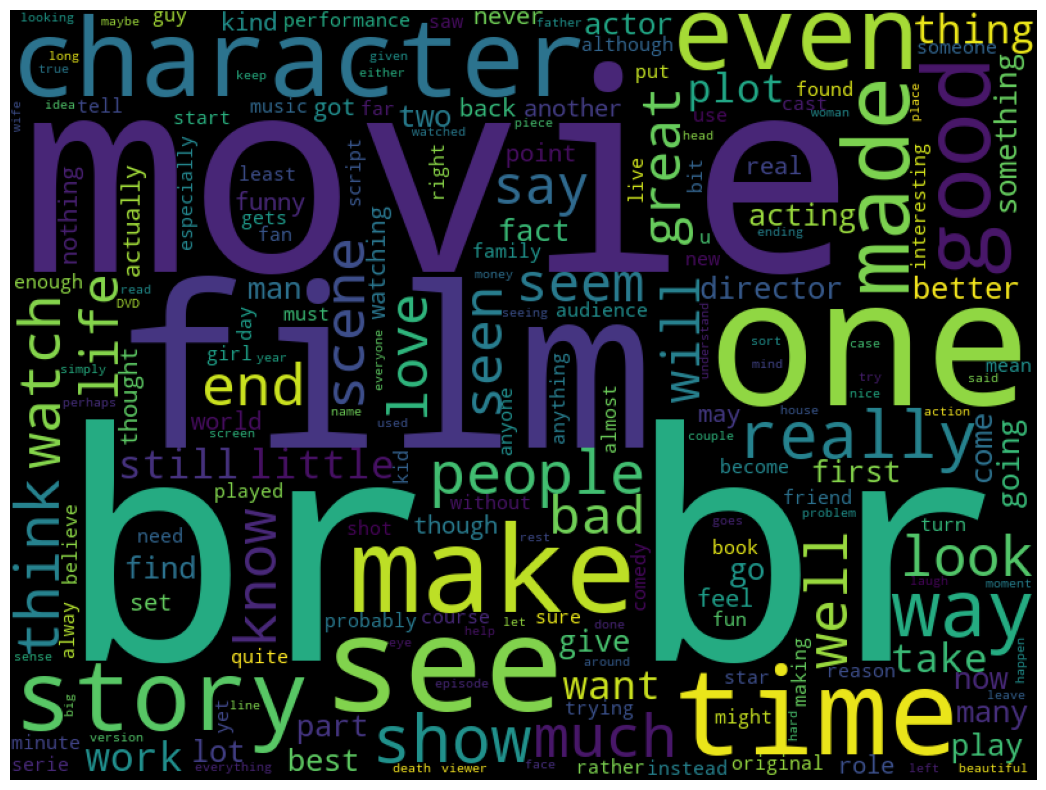

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline 

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", width=800, height=600).generate(" ".join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

ValueError: If using all scalar values, you must pass an index

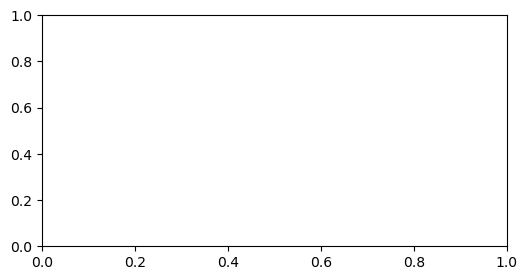

In [53]:
import seaborn as sns

sentiment = train_df['sentiment'].value_counts()
fig, axs = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])

<AxesSubplot:ylabel='count'>

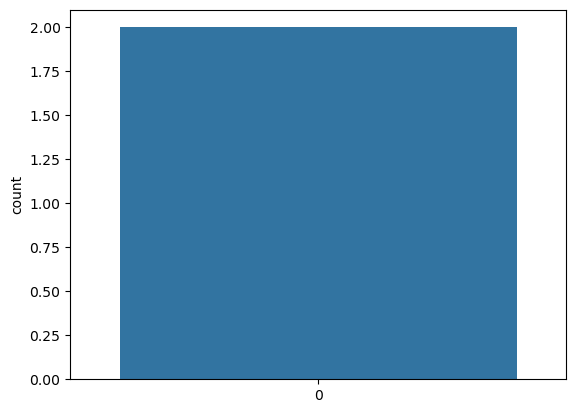

In [55]:
sns.countplot(sentiment)

# 텍스트 분류

## 데이터 분석 및 전처리

In [58]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# 그래프를 주피터 노트북에서 바로 그리게 함

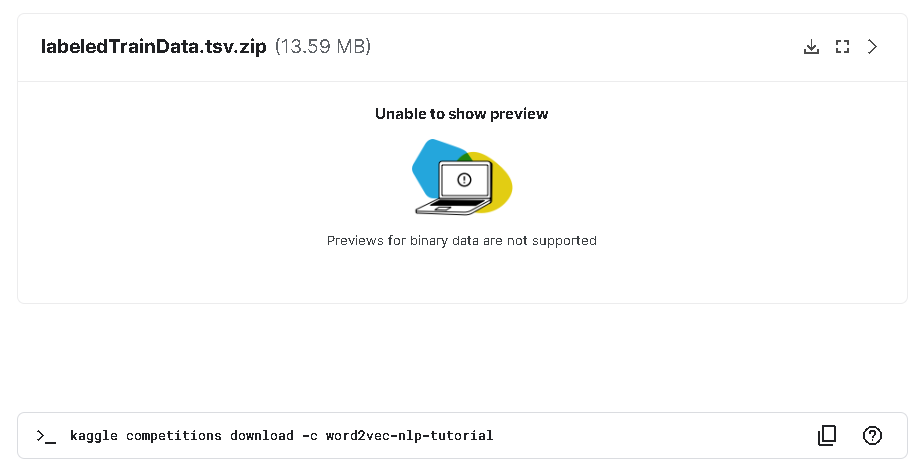

In [70]:
DATA_IN_PATH = 'c:/preprocessing/'

In [71]:
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [74]:
print('파일 크기 : ')
for file in os.listdir(DATA_IN_PATH) : 
        if 'tsv' in file and 'zip' not in file:
            print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [75]:
print(f"전체 학습 데이터의 개수 : {len(train_data)}")

전체 학습 데이터의 개수 : 25000


In [76]:
# review의 길이
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

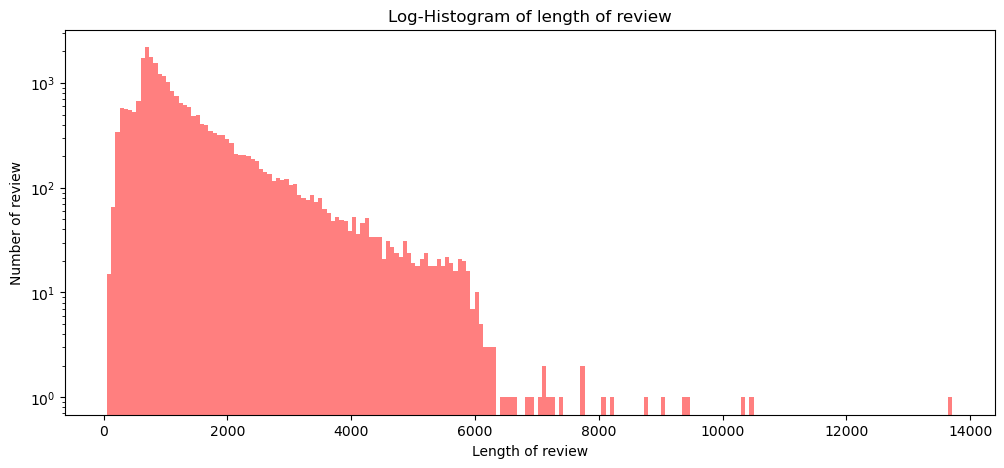

In [78]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log')
plt.title("Log-Histogram of length of review")
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [79]:
print(f"문장 최대 길이 : {np.max(train_length)}")
print(f"문장 최소 길이 : {np.min(train_length)}")
print(f"문장 평균 길이 : {np.mean(train_length)}")
print(f"문장 길이 표준편차 : {np.std(train_length)}")
print(f"문장 중간 길이 : {np.median(train_length)}")
print(f"제1사분위 길이 : {np.percentile(train_length, 25)}")
print(f"제3사분위 길이 : {np.percentile(train_length, 75)}")

문장 최대 길이 : 13710
문장 최소 길이 : 54
문장 평균 길이 : 1329.71056
문장 길이 표준편차 : 1005.2191407969154
문장 중간 길이 : 983.0
제1사분위 길이 : 705.0
제3사분위 길이 : 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x232709e60d0>,
 'caps': [<matplotlib.lines.Line2D at 0x232709e6670>,
 'boxes': [<matplotlib.lines.Line2D at 0x23270a0cdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x232709e6c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x232709fb1f0>],
 'means': [<matplotlib.lines.Line2D at 0x232709e6ee0>]}

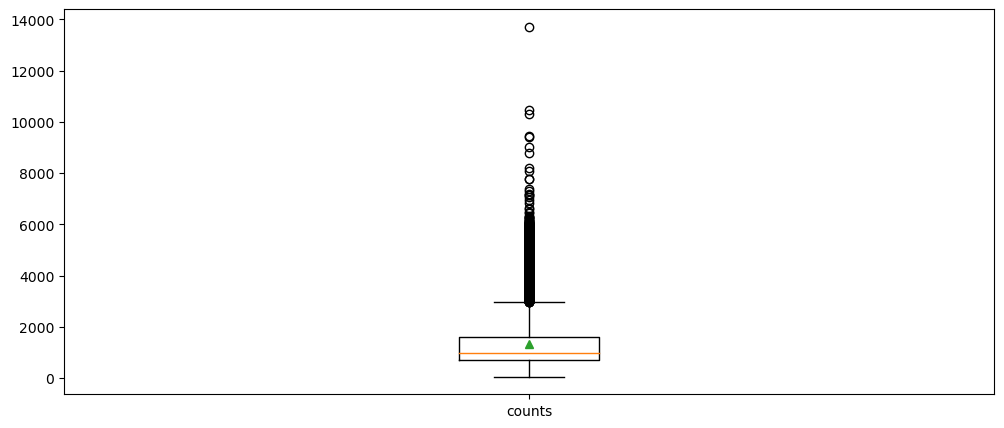

In [80]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

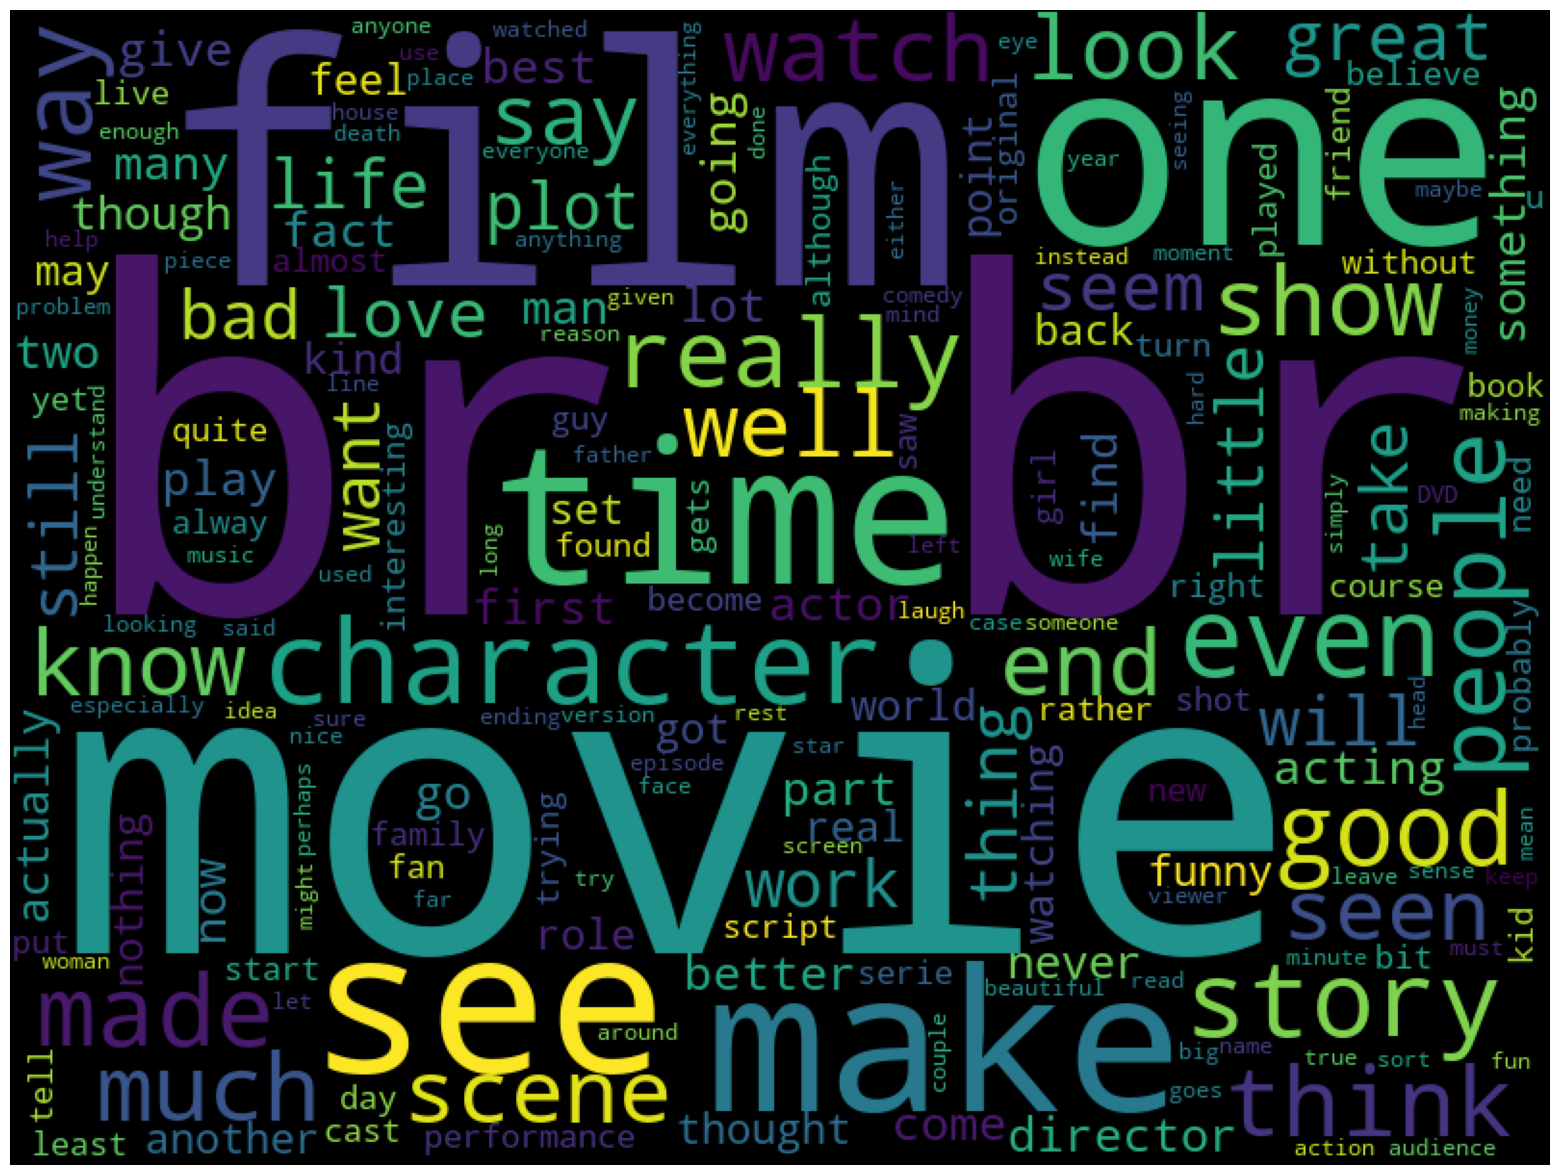

In [82]:
from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis("off")
plt.show()

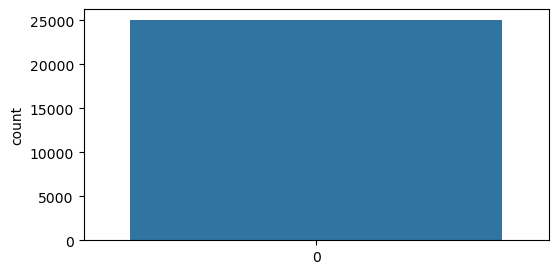

In [94]:
fig,axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])
# ? 0,1 두개 떠야 되는데

In [95]:
print(f"긍정 리뷰 개수 : {train_data['sentiment'].value_counts()[1]}")
print(f"부정 리뷰 개수 : {train_data['sentiment'].value_counts()[0]}")

긍정 리뷰 개수 : 12500
부정 리뷰 개수 : 12500


In [96]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of review')

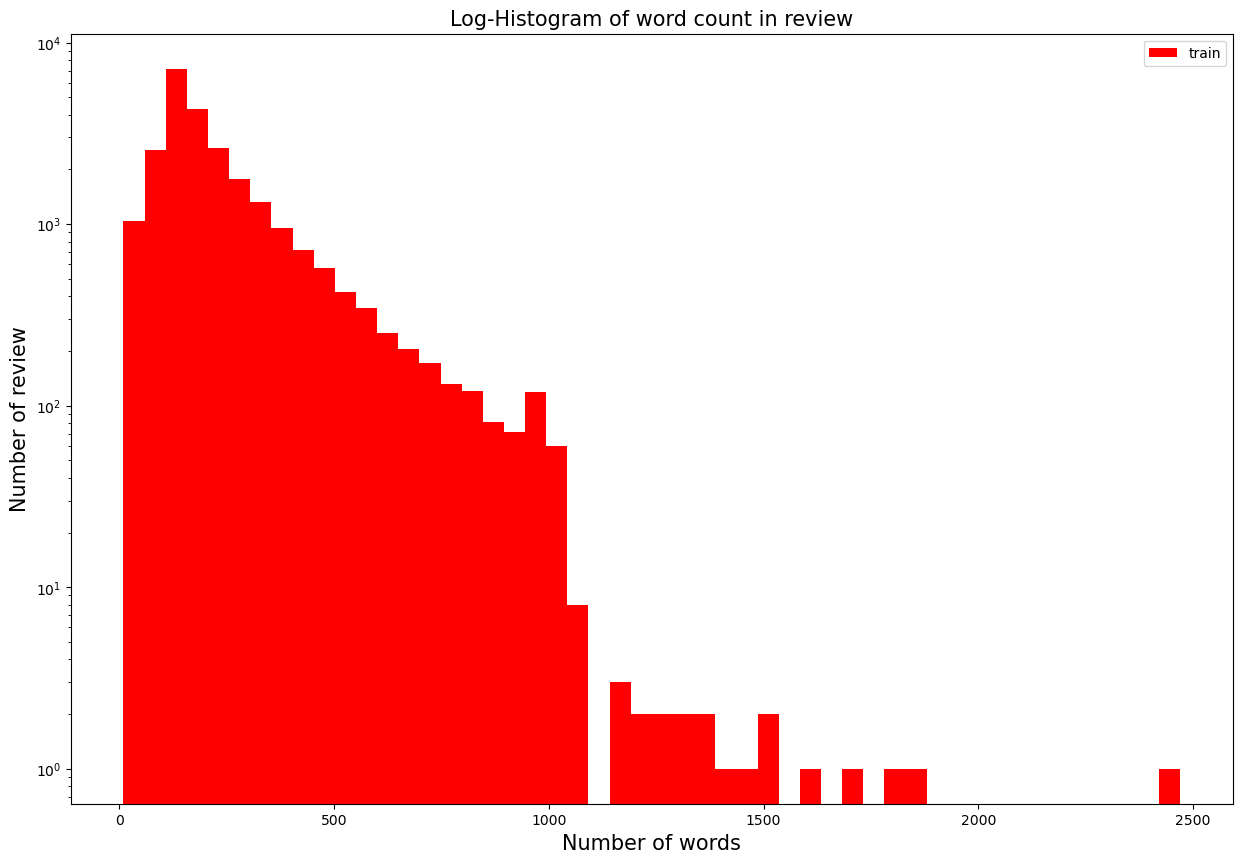

In [97]:
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.yscale('log')
plt.title("Log-Histogram of word count in review", fontsize = 15)
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of review', fontsize = 15)

-> 대부분의 단어가 1000개 미만의 단어를 가지고 대부분 200개 정도의 단어를 가지고 있음

In [98]:
print(f"리뷰 단어 개수 최댓값 : {np.max(train_word_counts)}")
print(f"리뷰 단어 개수 최솟값 : {np.min(train_word_counts)}")
print(f"리뷰 단어 개수 평균값 : {np.mean(train_word_counts)}")
print(f"리뷰 단어 개수 표준편차 : {np.std(train_word_counts)}")
print(f"리뷰 단어 개수 중간값 : {np.median(train_word_counts)}")
print(f"제1사분위 길이 : {np.percentile(train_word_counts, 25)}")
print(f"제3사분위 길이 : {np.percentile(train_word_counts, 75)}")

리뷰 단어 개수 최댓값 : 2470
리뷰 단어 개수 최솟값 : 10
리뷰 단어 개수 평균값 : 233.78624
리뷰 단어 개수 표준편차 : 173.74237015380743
리뷰 단어 개수 중간값 : 174.0
제1사분위 길이 : 127.0
제3사분위 길이 : 284.0


In [100]:
# 구두점과 대소문자 비율
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))  ## 물음표가 구두점
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))  ## 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))  # 첫 번째 대분자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))  ## 대문자 개수
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))  ## 숫자 개수

print(f'물음표가 있는 질문: {qmarks * 100}')
print(f'마침표가 있는 질문: {fullstop * 100}')
print(f'첫 글자가 대문자인 질문: {capital_first * 100}')
print(f'대문자가 있는 질문: {capitals * 100}')
print(f'숫자가 있는 질문: {numbers * 100}')

물음표가 있는 질문: 29.552
마침표가 있는 질문: 99.688
첫 글자가 대문자인 질문: 0.0
대문자가 있는 질문: 99.592
숫자가 있는 질문: 56.65599999999999


## 데이터 전처리

In [101]:
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [102]:
DATA_IN_PATH = 'C:/preprocessing/data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data['review'][0])  # 첫 번째 리뷰 데이터

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [ ]:
review = train_data['review'][0]

In [ ]:
(p.158 까지)